<a href="https://colab.research.google.com/github/vinayakkgarg/HybridLSTM_For_NIFTY_predictions/blob/main/CorrMat_global_indices_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing the libraries

In [ ]:
import pandas as pd
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## 2. Loading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/stockDataset-Daily-20yrs
!ls
!rm -rf ./new_df.csv

/content/gdrive/MyDrive/stockDataset-Daily-20yrs
dax.csv  ftse.csv   nasdaq.csv	snp.csv       twse.csv
dji.csv  hsi.csv    nifty.csv	sti.csv       us_10.csv
dxy.csv  kospi.csv  nikkei.csv	tech-ind.csv  usdinr.csv


Reading the names of all dataframes into a list

In [ ]:
list_of_dfs = []
for x in os.listdir():
  list_of_dfs.append(x[:-4])

Storing all dataframes in a dictionary all_dfs

In [ ]:
all_dfs={}
for x in list_of_dfs:
  all_dfs[x] = pd.read_csv(x+'.csv',parse_dates=True)
  

## 3. Preprocessing data

Filtering useful columns out of all dfs

In [ ]:
for i in all_dfs.keys():
  
  print(i,all_dfs[i].columns)
  all_dfs[i]['Date'] = pd.to_datetime(all_dfs[i]['Date'])
  if('Close/Last' in all_dfs[i]):
    all_dfs[i] = all_dfs[i].filter(['Date','Close/Last'])

  if('Close' in all_dfs[i]):
    all_dfs[i] = all_dfs[i].filter(['Date','Close'])
  if('Price' in all_dfs[i]):
    all_dfs[i] = all_dfs[i].filter(['Date','Price'])
  if(' Close' in all_dfs[i]):
    all_dfs[i] = all_dfs[i].filter(['Date',' Close'])
  if('INR' in all_dfs[i]):
    all_dfs[i] = all_dfs[i].filter(['Date','INR'])
  all_dfs[i].columns = ['Date',i]
  


dax Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
dji Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')
dxy Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
hsi Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
kospi Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
nasdaq Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
nifty Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')
nikkei Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
twse Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
usdinr Index(['Date', 'USD', 'INR'], dtype='object')
us_10 Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %'], dtype='object')
ftse Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')
sti 

Viewing the date format of all dfs

In [ ]:
for i in all_dfs.keys():
  print(i,all_dfs[i]['Date'])

dax 0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
5432   2021-03-31
5433   2021-04-01
5434   2021-04-06
5435   2021-04-07
5436   2021-04-08
Name: Date, Length: 5437, dtype: datetime64[ns]
dji 0      2021-04-09
1      2021-04-08
2      2021-04-07
3      2021-04-06
4      2021-04-05
          ...    
5348   2000-01-07
5349   2000-01-06
5350   2000-01-05
5351   2000-01-04
5352   2000-01-03
Name: Date, Length: 5353, dtype: datetime64[ns]
dxy 0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
6525   2021-04-05
6526   2021-04-06
6527   2021-04-07
6528   2021-04-08
6529   2021-04-09
Name: Date, Length: 6530, dtype: datetime64[ns]
hsi 0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
5317   2021-03-31
5318   2021-04-01
5319   2021-04-07
5320   2021-04-08
5321   2021-04-09
Name: Date, Length: 5322, dtype: datetime64[ns]


Viewing columns of all dfs

In [ ]:
for i in all_dfs.keys():
  print(i,all_dfs[i].columns)

dax Index(['Date', 'dax'], dtype='object')
dji Index(['Date', 'dji'], dtype='object')
dxy Index(['Date', 'dxy'], dtype='object')
hsi Index(['Date', 'hsi'], dtype='object')
kospi Index(['Date', 'kospi'], dtype='object')
nasdaq Index(['Date', 'nasdaq'], dtype='object')
nifty Index(['Date', 'nifty'], dtype='object')
nikkei Index(['Date', 'nikkei'], dtype='object')
twse Index(['Date', 'twse'], dtype='object')
usdinr Index(['Date', 'usdinr'], dtype='object')
us_10 Index(['Date', 'us_10'], dtype='object')
ftse Index(['Date', 'ftse'], dtype='object')
sti Index(['Date', 'sti'], dtype='object')
snp Index(['Date', 'snp'], dtype='object')
tech-ind Index(['Date', 'tech-ind'], dtype='object')


Separating NIFTY into a new_df

In [ ]:
new_df = pd.DataFrame(all_dfs['nifty'])

Merging all dfs using left join on basis of Nifty dates 

In [ ]:
for i in all_dfs:
  if(i!='nifty'):
    new_df = new_df.merge(all_dfs[i], on="Date", how = 'left')


## 4. Preparing data for LSTM

Drop date column as it is not a feature to train the LSTM on

In [ ]:
new_df_copy = new_df.drop(columns = ['Date','tech-ind'])

In [ ]:
new_df_copy.columns

Index(['nifty', 'dax', 'dji', 'dxy', 'hsi', 'kospi', 'nasdaq', 'nikkei',
       'twse', 'usdinr', 'us_10', 'ftse', 'sti', 'snp'],
      dtype='object')

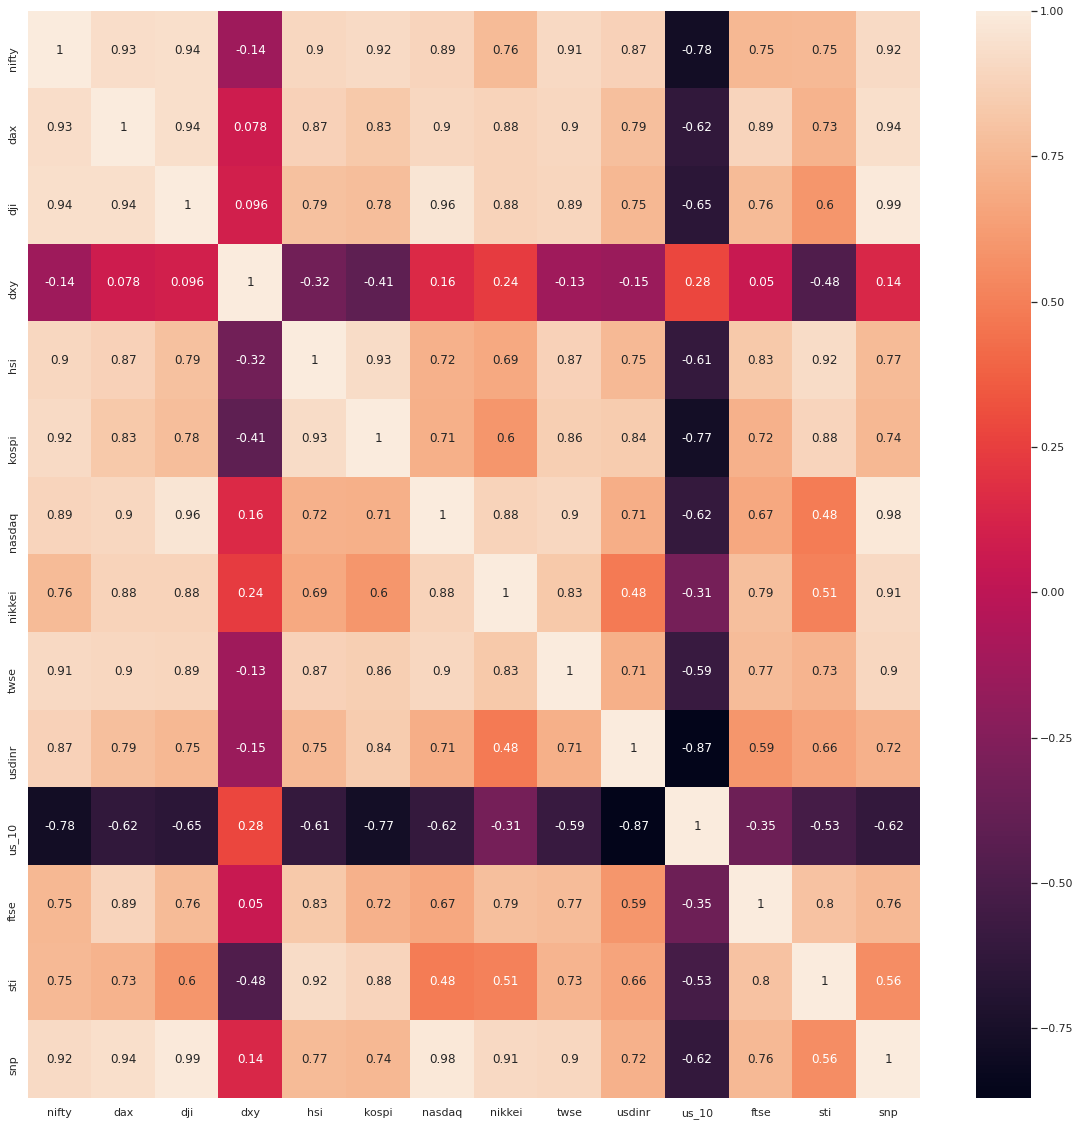

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

cor_mat_df = new_df_copy

corrMatrix = new_df_copy.corr()
sn.heatmap(corrMatrix, annot=True)
sn.set(rc={'figure.figsize':(20,20)})
plt.show()